# Formula 1 Championship Analysis (2022-2024)

Comprehensive analysis of Formula 1 data from 2022 to 2024, examining race performance, championship standings, and team dynamics across multiple seasons.

Analysis covers:
- Championship standings and points distribution
- Team and driver performance metrics
- Qualifying session analysis
- Race results and reliability patterns
- Track-specific performance trends

## Data Sources
- Race results and qualifying data
- Driver and constructor standings
- Race schedules and circuit information

# Notebook Structure

1. Setup & Data Loading
2. Championship Analysis
3. Race Performance Analysis
4. Qualifying Analysis
5. Performance Summary

# 1. Setup & Data Loading

## Library Imports and Configuration

## Import Libraries

In [379]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style for better visualizations
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titlepad'] = 20
plt.rcParams['axes.labelsize'] = 12


C:\Users\Fares\AppData\Local\Temp\ipykernel_26996\1445137652.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [380]:
# Define F1 team colors for 2022-2024
f1_team_colors = {
    'Red Bull': '#0600EF',       # Dark Blue
    'Mercedes': '#00D2BE',       # Turquoise
    'Ferrari': '#DC0000',        # Red
    'McLaren': '#FF8700',        # Orange
    'Aston Martin': '#006F62',   # British Racing Green
    'Alpine': '#0090FF',         # Blue
    'Williams': '#005AFF',       # Blue
    'AlphaTauri': '#2B4562',     # Navy Blue
    'Alfa Romeo': '#900000',     # Dark Red
    'Haas': '#FFFFFF'            # White
}

# Define driver colors (based on their current team)
driver_team_mapping = {
    'Max Verstappen': 'Red Bull',
    'Sergio Perez': 'Red Bull',
    'Lewis Hamilton': 'Mercedes',
    'George Russell': 'Mercedes',
    'Charles Leclerc': 'Ferrari',
    'Carlos Sainz': 'Ferrari',
    'Lando Norris': 'McLaren',
    'Oscar Piastri': 'McLaren',
    'Fernando Alonso': 'Aston Martin',
    'Lance Stroll': 'Aston Martin'
}

# Helper functions
def get_driver_color(driver_name):
    """Get color for driver based on their team"""
    team = driver_team_mapping.get(driver_name)
    return f1_team_colors.get(team, '#666666')  # Default gray if team not found

def apply_team_colors(ax, data, constructor_column='constructorName'):
    """Apply team colors to plot elements"""
    for i, bar in enumerate(ax.patches):
        constructor = data.iloc[i % len(data[constructor_column].unique())][constructor_column]
        bar.set_facecolor(f1_team_colors.get(constructor, '#666666'))
        bar.set_alpha(0.8)

def format_plot(title, xlabel, ylabel, rotation=0):
    """Apply consistent formatting to plots"""
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()

## Data Loading & Processing

Loading and preparing data from all CSV files for analysis.

In [381]:
# Load schedule data if not already loaded
schedules = {}
for year in [2022, 2023, 2024]:
	schedules[year] = pd.read_csv(f'data_csv/schedule_{year}.csv')
	schedules[year]['year'] = year

# Merge all schedules
all_schedules = pd.concat(schedules.values(), ignore_index=True)
all_schedules['date'] = pd.to_datetime(all_schedules['date'])

# Create analyses folder if it doesn't exist
Path("analyses").mkdir(exist_ok=True)

# Save all merged datasets
all_driver_standings.to_csv("analyses/all_driver_standings.csv", index=False)
all_constructor_standings.to_csv("analyses/all_constructor_standings.csv", index=False)
all_race_results.to_csv("analyses/all_race_results.csv", index=False)
all_qualifying_results.to_csv("analyses/all_qualifying_results.csv", index=False)
all_schedules.to_csv("analyses/all_schedules.csv", index=False)

print("All merged data saved to analyses folder:")
print("- Driver standings")
print("- Constructor standings")
print("- Race results")
print("- Qualifying results")
print("- Race schedules")

All merged data saved to analyses folder:
- Driver standings
- Constructor standings
- Race results
- Qualifying results
- Race schedules


In [382]:
# Load race results data
race_results = {}
for year in [2022, 2023, 2024]:
    race_results[year] = pd.read_csv(f'data_csv/results_{year}_all_rounds.csv')

# Merge all results
all_race_results = pd.concat(race_results.values(), ignore_index=True)

# Load qualifying data
qualifying_results = {}
for year in [2022, 2023, 2024]:
    qualifying_results[year] = pd.read_csv(f'data_csv/qualifying_{year}_all_rounds.csv')

# Merge all qualifying data
all_qualifying_results = pd.concat(qualifying_results.values(), ignore_index=True)

print('Race Results Sample:')
display(all_race_results.head())
print('\nQualifying Results Sample:')
display(all_qualifying_results.head())

Race Results Sample:


,year,round,raceName,date,driverName,constructorName,position,points,status,grid,laps,fastestLapTime
0,2022,1,Bahrain Grand Prix,2022-03-20,Charles Leclerc,Ferrari,1,26,Finished,1,57,1:34.570
1,2022,1,Bahrain Grand Prix,2022-03-20,Carlos Sainz,Ferrari,2,18,Finished,3,57,1:35.740
2,2022,1,Bahrain Grand Prix,2022-03-20,Lewis Hamilton,Mercedes,3,15,Finished,5,57,1:36.228
3,2022,1,Bahrain Grand Prix,2022-03-20,George Russell,Mercedes,4,12,Finished,9,57,1:36.302
4,2022,1,Bahrain Grand Prix,2022-03-20,Kevin Magnussen,Haas F1 Team,5,10,Finished,7,57,1:36.623



Qualifying Results Sample:


,year,round,raceName,date,driverName,constructorName,position,Q1,Q2,Q3
0,2022,1,Bahrain Grand Prix,2022-03-20,Charles Leclerc,Ferrari,1,1:31.471,1:30.932,1:30.558
1,2022,1,Bahrain Grand Prix,2022-03-20,Max Verstappen,Red Bull,2,1:31.785,1:30.757,1:30.681
2,2022,1,Bahrain Grand Prix,2022-03-20,Carlos Sainz,Ferrari,3,1:31.567,1:30.787,1:30.687
3,2022,1,Bahrain Grand Prix,2022-03-20,Sergio Pérez,Red Bull,4,1:32.311,1:31.008,1:30.921
4,2022,1,Bahrain Grand Prix,2022-03-20,Lewis Hamilton,Mercedes,5,1:32.285,1:31.048,1:31.238


In [383]:
# Define function to load and merge data
def load_and_merge_data(data_type, pattern):
    """Load and merge data from CSV files for given years"""
    data_dict = {}
    for year in [2022, 2023, 2024]:
        # Use _all_rounds.csv for results and qualifying, otherwise use standard pattern
        if pattern in ['results', 'qualifying']:
            filepath = f'data_csv/{pattern}_{year}_all_rounds.csv'
        else:
            filepath = f'data_csv/{pattern}_{year}.csv'
        data_dict[year] = pd.read_csv(filepath)
        data_dict[year]['year'] = year

    merged_data = pd.concat(data_dict.values(), ignore_index=True)
    print(f'Loaded {data_type} data for 2022-2024')
    return merged_data

# Load all datasets
all_driver_standings = load_and_merge_data('driver standings', 'driver_standings')
all_constructor_standings = load_and_merge_data('constructor standings', 'constructor_standings')
all_race_results = load_and_merge_data('race results', 'results')
all_qualifying_results = load_and_merge_data('qualifying', 'qualifying')
all_schedules = load_and_merge_data('schedules', 'schedule')

# Convert date columns
all_schedules['date'] = pd.to_datetime(all_schedules['date'])

# Display samples
for name, df in {
    'Driver Standings': all_driver_standings,
    'Constructor Standings': all_constructor_standings,
    'Race Results': all_race_results,
    'Qualifying Results': all_qualifying_results,
    'Race Schedule': all_schedules
}.items():
    print(f'\n{name} Sample:')
    display(df.head(2))

Loaded driver standings data for 2022-2024
Loaded constructor standings data for 2022-2024
Loaded race results data for 2022-2024
Loaded qualifying data for 2022-2024
Loaded schedules data for 2022-2024

Driver Standings Sample:


,year,position,driverName,constructorName,points,wins
0,2022,1,Max Verstappen,Red Bull,454,15
1,2022,2,Charles Leclerc,Ferrari,308,3



Constructor Standings Sample:


,year,position,constructorName,points,wins
0,2022,1,Red Bull,759,17
1,2022,2,Ferrari,554,4



Race Results Sample:


,year,round,raceName,date,driverName,constructorName,position,points,status,grid,laps,fastestLapTime
0,2022,1,Bahrain Grand Prix,2022-03-20,Charles Leclerc,Ferrari,1,26,Finished,1,57,1:34.570
1,2022,1,Bahrain Grand Prix,2022-03-20,Carlos Sainz,Ferrari,2,18,Finished,3,57,1:35.740



Qualifying Results Sample:


,year,round,raceName,date,driverName,constructorName,position,Q1,Q2,Q3
0,2022,1,Bahrain Grand Prix,2022-03-20,Charles Leclerc,Ferrari,1,1:31.471,1:30.932,1:30.558
1,2022,1,Bahrain Grand Prix,2022-03-20,Max Verstappen,Red Bull,2,1:31.785,1:30.757,1:30.681



Race Schedule Sample:


,year,round,raceName,date,time,circuitName,locality,country,lat,long
0,2022,1,Bahrain Grand Prix,2022-03-20,15:00:00Z,Bahrain International Circuit,Sakhir,Bahrain,26.0325,50.5106
1,2022,2,Saudi Arabian Grand Prix,2022-03-27,17:00:00Z,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,21.6319,39.1044


In [384]:
# Load schedule data
schedules = {}
for year in [2022, 2023, 2024]:
    schedules[year] = pd.read_csv(f'data_csv/schedule_{year}.csv')
    schedules[year]['year'] = year

# Merge all schedules
all_schedules = pd.concat(schedules.values(), ignore_index=True)

# Convert date to datetime
all_schedules['date'] = pd.to_datetime(all_schedules['date'])

print('Schedule Data Sample:')
display(all_schedules.head())

Schedule Data Sample:


,year,round,raceName,date,time,circuitName,locality,country,lat,long
0,2022,1,Bahrain Grand Prix,2022-03-20,15:00:00Z,Bahrain International Circuit,Sakhir,Bahrain,26.0325,50.5106
1,2022,2,Saudi Arabian Grand Prix,2022-03-27,17:00:00Z,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,21.6319,39.1044
2,2022,3,Australian Grand Prix,2022-04-10,05:00:00Z,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680
3,2022,4,Emilia Romagna Grand Prix,2022-04-24,13:00:00Z,Autodromo Enzo e Dino Ferrari,Imola,Italy,44.3439,11.7167
4,2022,5,Miami Grand Prix,2022-05-08,19:30:00Z,Miami International Autodrome,Miami,USA,25.9581,-80.2389


In [385]:
# Create analyses folder if it doesn't exist
Path("analyses").mkdir(exist_ok=True)

# Save all merged datasets
all_driver_standings.to_csv("analyses/all_driver_standings.csv", index=False)
all_constructor_standings.to_csv("analyses/all_constructor_standings.csv", index=False)
all_race_results.to_csv("analyses/all_race_results.csv", index=False)
all_qualifying_results.to_csv("analyses/all_qualifying_results.csv", index=False)
all_schedules.to_csv("analyses/all_schedules.csv", index=False)

print("All merged data saved to analyses folder:")
print("- Driver standings")
print("- Constructor standings")
print("- Race results")
print("- Qualifying results")
print("- Race schedules")

All merged data saved to analyses folder:
- Driver standings
- Constructor standings
- Race results
- Qualifying results
- Race schedules


In [386]:
# Check data types and missing values
def check_data_quality(df, name):
    print(f'\n{name} Data Types:')
    display(df.dtypes)
    print(f'\nMissing Values in {name}:')
    display(df.isnull().sum())

# Check all datasets
check_data_quality(all_driver_standings, 'Driver Standings')
check_data_quality(all_constructor_standings, 'Constructor Standings')
check_data_quality(enhanced_race_results, 'Race Results')
check_data_quality(enhanced_qualifying_results, 'Qualifying Results')


Driver Standings Data Types:


year                int64
position            int64
driverName         object
constructorName    object
points              int64
wins                int64
dtype: object


Missing Values in Driver Standings:


year               0
position           0
driverName         0
constructorName    0
points             0
wins               0
dtype: int64


Constructor Standings Data Types:


year                int64
position            int64
constructorName    object
points              int64
wins                int64
dtype: object


Missing Values in Constructor Standings:


year               0
position           0
constructorName    0
points             0
wins               0
dtype: int64


Race Results Data Types:


year                 int64
round                int64
raceName            object
date                object
driverName          object
constructorName     object
position             int64
points               int64
status              object
grid                 int64
laps                 int64
fastestLapTime      object
finish_category     object
position_change    float64
avg_position       float64
points_per_race    float64
dtype: object


Missing Values in Race Results:


year                0
round               0
raceName            0
date                0
driverName          0
constructorName     0
position            0
points              0
status              0
grid                0
laps                0
fastestLapTime     60
finish_category     0
position_change     0
avg_position        0
points_per_race     0
dtype: int64


Qualifying Results Data Types:


year                 int64
round                int64
raceName            object
date                object
driverName          object
constructorName     object
position             int64
Q1                  object
Q2                  object
Q3                  object
Q1_seconds         float64
Q2_seconds         float64
Q3_seconds         float64
q_improvement      float64
dtype: object


Missing Values in Qualifying Results:


year                 0
round                0
raceName             0
date                 0
driverName           0
constructorName      0
position             0
Q1                  13
Q2                 349
Q3                 699
Q1_seconds          13
Q2_seconds         349
Q3_seconds         699
q_improvement      699
dtype: int64

## Feature Engineering

Let's create some useful features for our analysis:

In [387]:
# Convert qualifying times to seconds
def time_to_seconds(time_str):
    if pd.isna(time_str):
        return None
    try:
        parts = time_str.split(':')
        if len(parts) == 2:
            minutes, seconds = parts
            return float(minutes) * 60 + float(seconds)
        return float(parts[0])
    except:
        return None

# Add qualifying time in seconds
for q in ['Q1', 'Q2', 'Q3']:
    if q in all_qualifying_results.columns:
        all_qualifying_results[f'{q}_seconds'] = all_qualifying_results[q].apply(time_to_seconds)

# Create race finish categories
all_race_results['finish_category'] = all_race_results['status'].apply(
    lambda x: 'Finished' if x == 'Finished' else 
             'Mechanical' if any(issue in x for issue in ['Engine', 'Gearbox', 'Technical']) else
             'Accident' if any(issue in x for issue in ['Accident', 'Collision']) else
             'Other'
)

# Calculate grid position changes
all_race_results['position_change'] = all_race_results['grid'].astype(float) - all_race_results['position'].astype(float)

# Calculate additional performance metrics
all_race_results['avg_position'] = all_race_results.groupby(['driverName', 'year'])['position'].transform('mean')
all_race_results['points_per_race'] = all_race_results.groupby(['driverName', 'year'])['points'].transform('mean')

# Add qualifying improvement metric
all_qualifying_results['q_improvement'] = all_qualifying_results.apply(
    lambda x: (x['Q1_seconds'] - x['Q3_seconds']) if pd.notnull(x.get('Q1_seconds')) and pd.notnull(x.get('Q3_seconds')) else None,
    axis=1
)

# Create enhanced datasets
enhanced_race_results = all_race_results
enhanced_qualifying_results = all_qualifying_results

# Save enhanced datasets
Path('analyses').mkdir(exist_ok=True)
enhanced_race_results.to_csv('analyses/enhanced_race_results.csv', index=False)
enhanced_qualifying_results.to_csv('analyses/enhanced_qualifying_results.csv', index=False)

print('Enhanced datasets created with additional features:')
print('Race Results:')
print('- finish_category: Categorized race finish status')
print('- position_change: Grid vs finish position difference')
print('- avg_position: Average position by driver per year')
print('- points_per_race: Average points by driver per year')
print('\nQualifying Results:')
print('- Q[1-3]_seconds: Converted qualifying times to seconds')
print('- q_improvement: Time improvement from Q1 to Q3')

Enhanced datasets created with additional features:
Race Results:
- finish_category: Categorized race finish status
- position_change: Grid vs finish position difference
- avg_position: Average position by driver per year
- points_per_race: Average points by driver per year

Qualifying Results:
- Q[1-3]_seconds: Converted qualifying times to seconds
- q_improvement: Time improvement from Q1 to Q3


### Enhanced Feature Engineering and Data Saving

Let's create additional features and save the enhanced datasets:

In [388]:
# Create enhanced datasets with additional features
enhanced_race_results = all_race_results.copy()
enhanced_qualifying_results = all_qualifying_results.copy()

# Add additional race analysis features
enhanced_race_results['avg_position'] = enhanced_race_results.groupby(['driverName', 'year'])['position'].transform('mean')
enhanced_race_results['points_per_race'] = enhanced_race_results.groupby(['driverName', 'year'])['points'].transform('mean')

# Add additional qualifying analysis features
enhanced_qualifying_results['q_improvement'] = enhanced_qualifying_results.apply(
    lambda x: (x['Q1_seconds'] - x['Q3_seconds']) if pd.notnull(x.get('Q1_seconds')) and pd.notnull(x.get('Q3_seconds')) else None,
    axis=1
)

# Save enhanced datasets
Path('analyses').mkdir(exist_ok=True)
enhanced_race_results.to_csv('analyses/enhanced_race_results.csv', index=False)
enhanced_qualifying_results.to_csv('analyses/enhanced_qualifying_results.csv', index=False)

print('Enhanced datasets saved with additional features:')
print('Race Results additional features:')
print('- finish_category: Categorized race finish status')
print('- position_change: Grid vs finish position difference')
print('- avg_position: Average position by driver per year')
print('- points_per_race: Average points by driver per year')
print('\nQualifying Results additional features:')
print('- Q[1-3]_seconds: Converted qualifying times to seconds')
print('- q_improvement: Time improvement from Q1 to Q3')

# Display sample of enhanced features
print('\nSample of Enhanced Race Results:')
display(enhanced_race_results[['driverName', 'year', 'finish_category', 'position_change', 'avg_position', 'points_per_race']].head())

print('\nSample of Enhanced Qualifying Results:')
display(enhanced_qualifying_results[['driverName', 'year', 'Q1_seconds', 'Q3_seconds', 'q_improvement']].head())

Enhanced datasets saved with additional features:
Race Results additional features:
- finish_category: Categorized race finish status
- position_change: Grid vs finish position difference
- avg_position: Average position by driver per year
- points_per_race: Average points by driver per year

Qualifying Results additional features:
- Q[1-3]_seconds: Converted qualifying times to seconds
- q_improvement: Time improvement from Q1 to Q3

Sample of Enhanced Race Results:


,driverName,year,finish_category,position_change,avg_position,points_per_race
0,Charles Leclerc,2022,Finished,0.0,5.500000,13.227273
1,Carlos Sainz,2022,Finished,1.0,7.863636,10.363636
2,Lewis Hamilton,2022,Finished,2.0,6.045455,10.590909
3,George Russell,2022,Finished,5.0,5.000000,11.909091
4,Kevin Magnussen,2022,Finished,2.0,14.136364,0.954545



Sample of Enhanced Qualifying Results:


,driverName,year,Q1_seconds,Q3_seconds,q_improvement
0,Charles Leclerc,2022,91.471,90.558,0.913
1,Max Verstappen,2022,91.785,90.681,1.104
2,Carlos Sainz,2022,91.567,90.687,0.880
3,Sergio Pérez,2022,92.311,90.921,1.390
4,Lewis Hamilton,2022,92.285,91.238,1.047


In [389]:
# Save the enhanced datasets with new features
all_qualifying_results.to_csv('analyses/enhanced_qualifying_results.csv', index=False)
all_race_results.to_csv('analyses/enhanced_race_results.csv', index=False)

print('Enhanced datasets saved with new features:')
print('- analyses/enhanced_qualifying_results.csv (with qualifying time conversions)')
print('- analyses/enhanced_race_results.csv (with finish categories and position changes)')

Enhanced datasets saved with new features:
- analyses/enhanced_qualifying_results.csv (with qualifying time conversions)
- analyses/enhanced_race_results.csv (with finish categories and position changes)


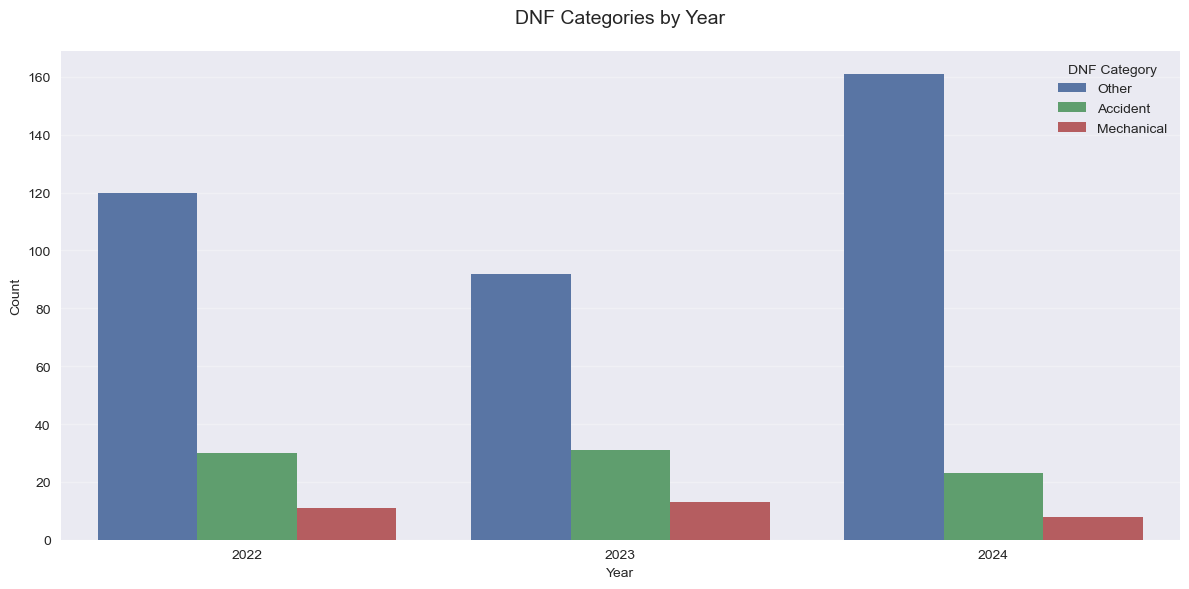

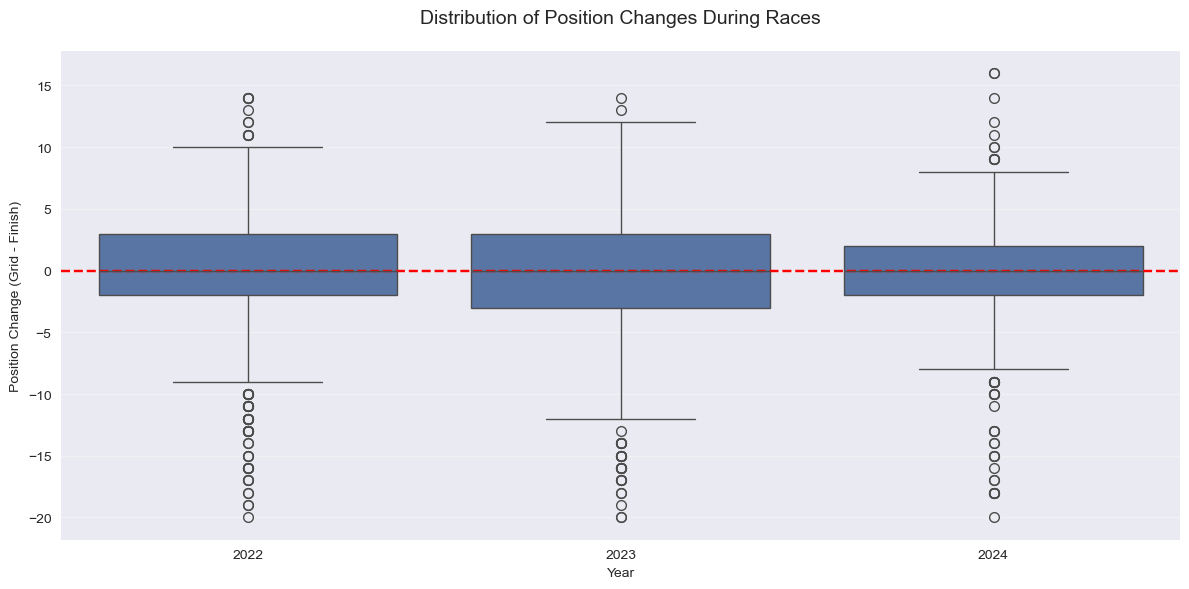

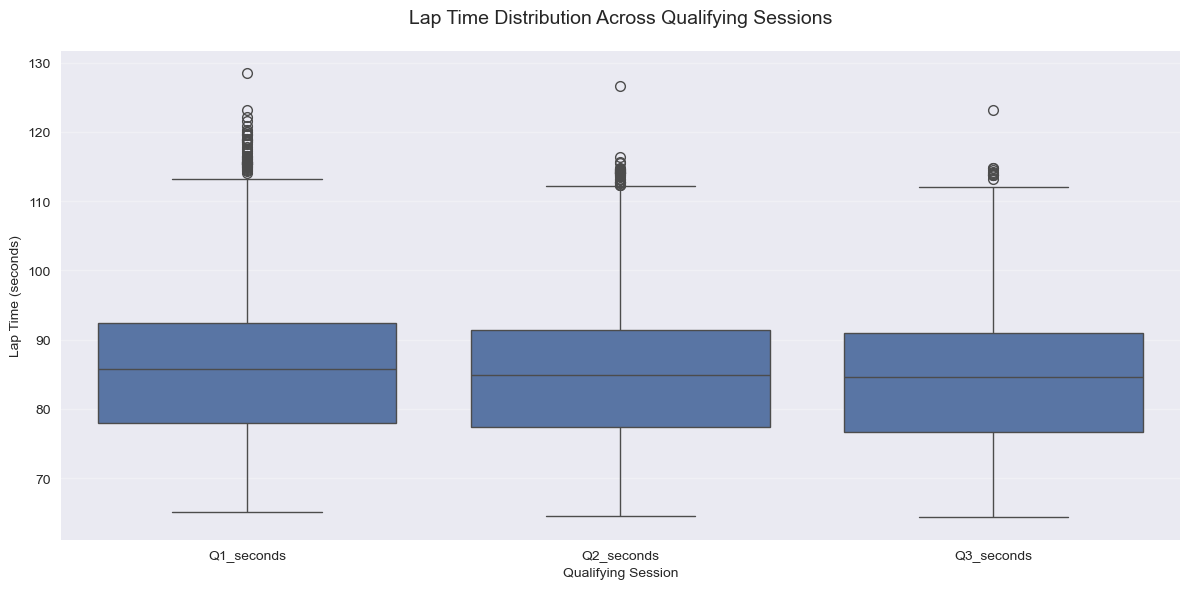

In [390]:
# Visualize the engineered features

# 1. DNF Categories by Year
plt.figure(figsize=(12, 6))
sns.countplot(data=all_race_results[all_race_results['finish_category'] != 'Finished'],
             x='year', hue='finish_category')
plt.title('DNF Categories by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='DNF Category')
plt.tight_layout()

# 2. Championship Analysis

# Position Changes Distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=all_race_results, x='year', y='position_change')
plt.title('Distribution of Position Changes During Races')
plt.xlabel('Year')
plt.ylabel('Position Change (Grid - Finish)')
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()

# 3. Qualifying Time Improvements
q_times = all_qualifying_results.melt(
    id_vars=['year', 'driverName'],
    value_vars=['Q1_seconds', 'Q2_seconds', 'Q3_seconds'],
    var_name='qualifying_session',
    value_name='lap_time'
).dropna()

plt.figure(figsize=(12, 6))
sns.boxplot(data=q_times, x='qualifying_session', y='lap_time')
plt.title('Lap Time Distribution Across Qualifying Sessions')
plt.xlabel('Qualifying Session')
plt.ylabel('Lap Time (seconds)')
plt.tight_layout()

# 2. Championship Analysis

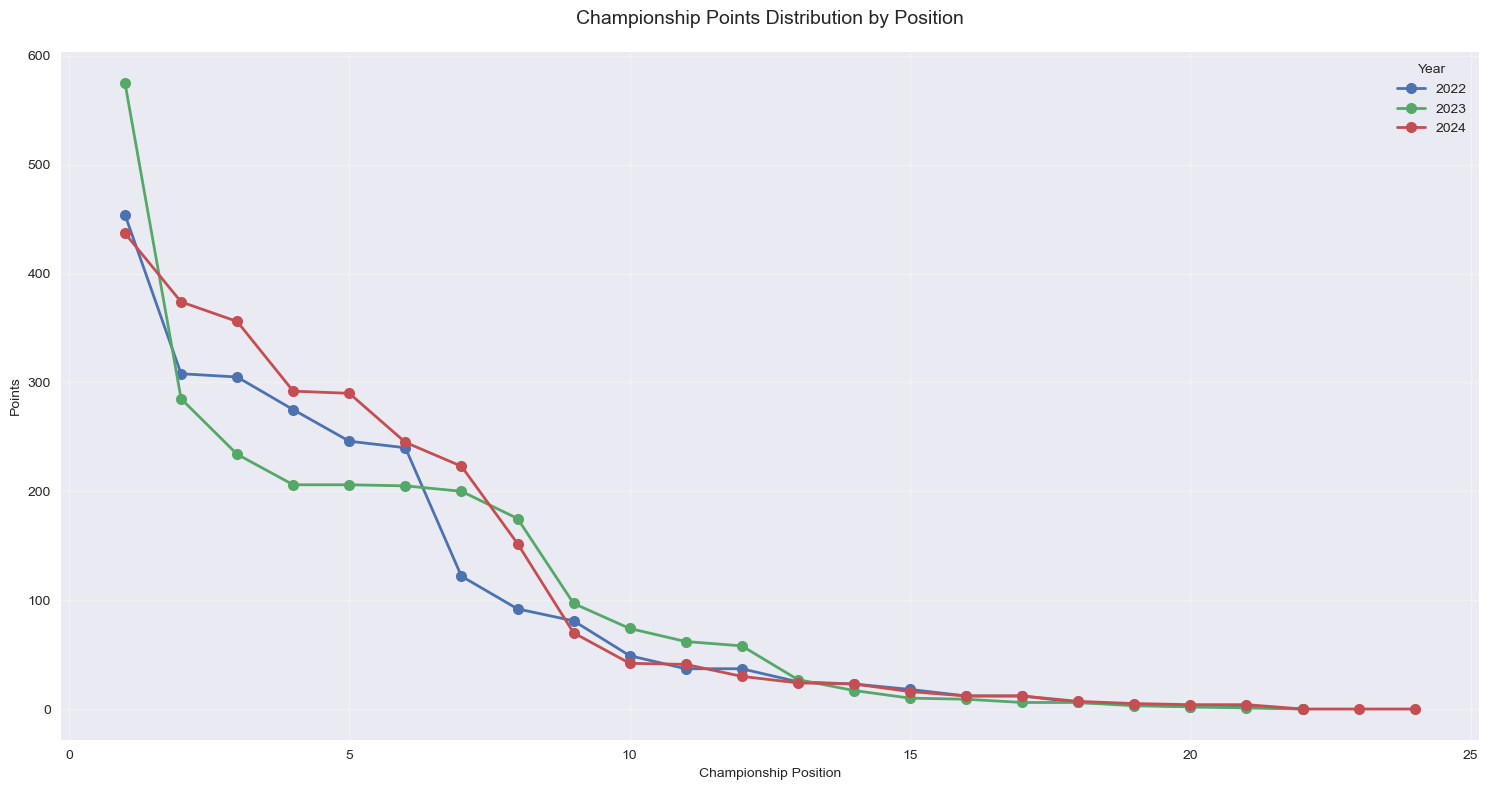

In [391]:
plt.figure(figsize=(15, 8))

# Plot points distribution for each year
for year in [2022, 2023, 2024]:
    year_data = all_driver_standings[all_driver_standings['year'] == year].sort_values('position')
    plt.plot(year_data['position'], year_data['points'], 
             marker='o', label=str(year), linewidth=2, markersize=8)

format_plot(
    title='Championship Points Distribution by Position',
    xlabel='Championship Position',
    ylabel='Points'
)
plt.legend(title='Year')

<Figure size 1200x800 with 0 Axes>

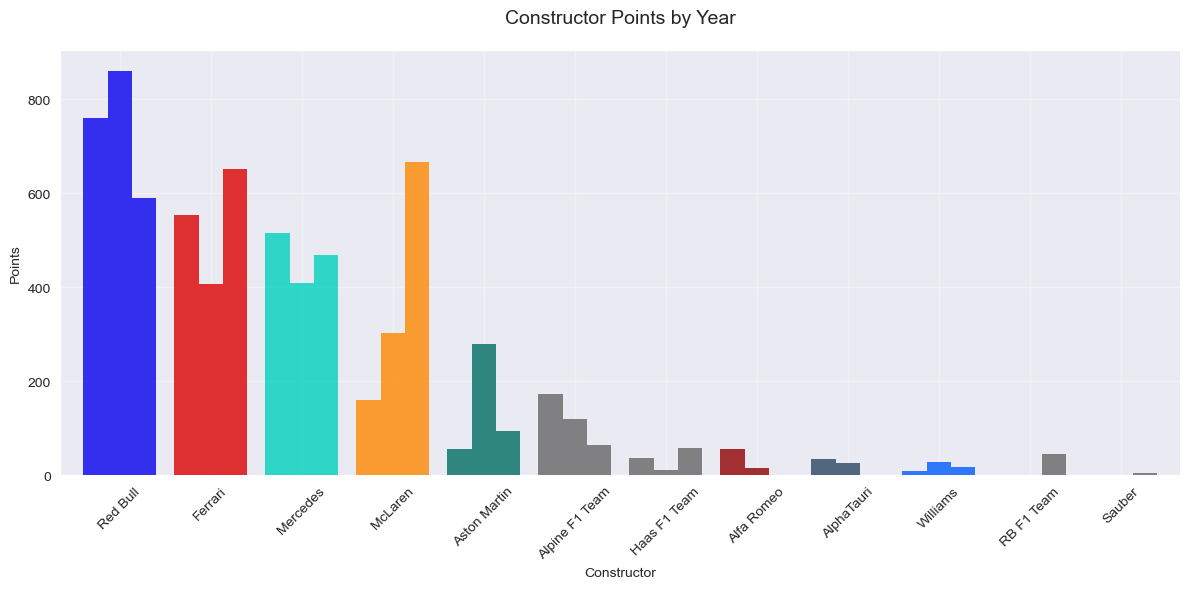

In [392]:
# Create pivot table for constructor points
constructor_yearly_points = pd.pivot_table(
    all_constructor_standings,
    values='points',
    index='constructorName',
    columns='year'
).fillna(0)

# Sort constructors by total points
constructor_yearly_points['total'] = constructor_yearly_points.sum(axis=1)
constructor_yearly_points = constructor_yearly_points.sort_values('total', ascending=False)
constructor_yearly_points = constructor_yearly_points.drop('total', axis=1)

# Plot constructor comparison
plt.figure(figsize=(12, 8))
ax = constructor_yearly_points.plot(kind='bar', width=0.8)

# Apply team colors to bars
for i, constructor in enumerate(constructor_yearly_points.index):
    color = f1_team_colors.get(constructor, '#666666')
    for j in range(len(constructor_yearly_points.columns)):
        bar_idx = i + j * len(constructor_yearly_points)
        if bar_idx < len(ax.patches):
            ax.patches[bar_idx].set_facecolor(color)
            ax.patches[bar_idx].set_alpha(0.8)

format_plot(
    title='Constructor Points by Year',
    xlabel='Constructor',
    ylabel='Points',
    rotation=45
)
# Remove legend as years are obvious from the grouped bars
ax.get_legend().remove()


# 3. Race Performance Analysis

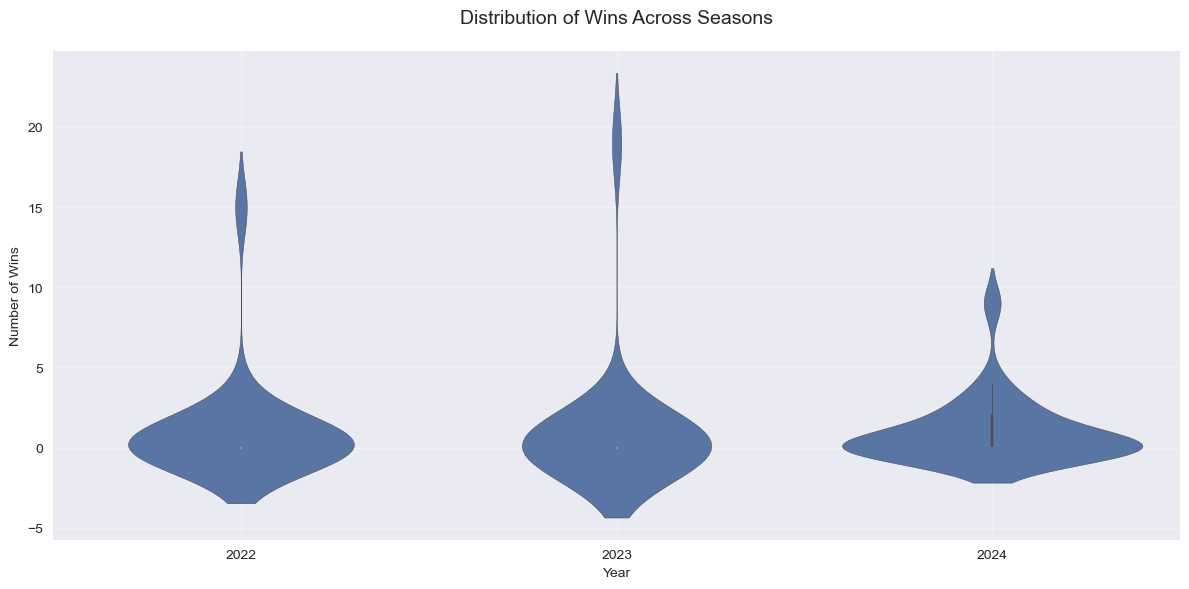

In [393]:
plt.figure(figsize=(12, 6))

# Create violin plot of wins distribution
ax = sns.violinplot(data=all_driver_standings, x='year', y='wins', inner='box')

format_plot(
    title='Distribution of Wins Across Seasons',
    xlabel='Year',
    ylabel='Number of Wins'
)

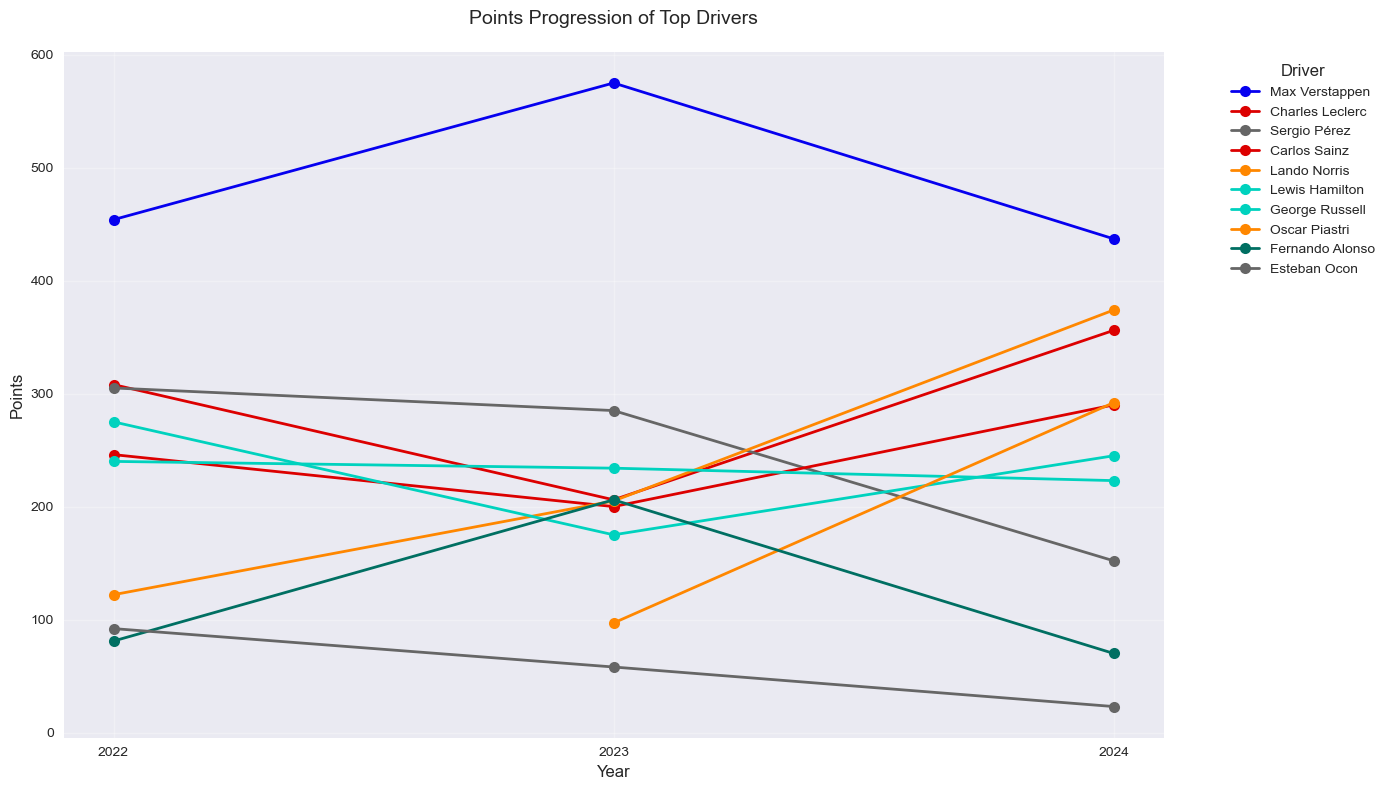

In [394]:
plt.figure(figsize=(14, 8))

# Sort drivers by total points to plot most successful drivers first
driver_total_points = all_driver_standings.groupby('driverName')['points'].sum().sort_values(ascending=False)
top_drivers = driver_total_points.head(10).index  # Show only top 10 drivers for clarity

for driver in top_drivers:
    driver_data = all_driver_standings[all_driver_standings['driverName'] == driver]
    color = get_driver_color(driver)
    plt.plot(driver_data['year'], driver_data['points'], 
             marker='o', label=driver, color=color, linewidth=2, markersize=8)

plt.title('Points Progression of Top Drivers', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, title_fontsize=12)
plt.xticks([2022, 2023, 2024], [2022, 2023, 2024])
plt.grid(True, alpha=0.3)
plt.tight_layout()

# 3. Race Performance Analysis

Analyzing race results including:
- Finishing positions and points distribution
- DNF rates and mechanical reliability
- Track-specific performance patterns
- Position gains and losses

## Race Results Analysis

This section analyzes race performance data including:
- Finishing positions and points
- DNF rates and types
- Track-specific performance patterns
- Constructor performance trends

In [395]:
# 5. Performance Summary

# Load race results data
race_results = {}
for year in [2022, 2023, 2024]:
    race_results[year] = pd.read_csv(f'data_csv/results_{year}_all_rounds.csv')

# Merge all results
all_race_results = pd.concat(race_results.values(), ignore_index=True)

# Display sample
print('Race Results Sample:')
display(all_race_results.head())

Race Results Sample:


,year,round,raceName,date,driverName,constructorName,position,points,status,grid,laps,fastestLapTime
0,2022,1,Bahrain Grand Prix,2022-03-20,Charles Leclerc,Ferrari,1,26,Finished,1,57,1:34.570
1,2022,1,Bahrain Grand Prix,2022-03-20,Carlos Sainz,Ferrari,2,18,Finished,3,57,1:35.740
2,2022,1,Bahrain Grand Prix,2022-03-20,Lewis Hamilton,Mercedes,3,15,Finished,5,57,1:36.228
3,2022,1,Bahrain Grand Prix,2022-03-20,George Russell,Mercedes,4,12,Finished,9,57,1:36.302
4,2022,1,Bahrain Grand Prix,2022-03-20,Kevin Magnussen,Haas F1 Team,5,10,Finished,7,57,1:36.623


# 4. Qualifying Analysis

Analyzing qualifying performance including:
- Pole position distribution
- Session time improvements
- Team qualifying pace
- Q1 to Q3 progression patterns

In [396]:
# Load qualifying data
qualifying_results = {}
for year in [2022, 2023, 2024]:
    qualifying_results[year] = pd.read_csv(f'data_csv/qualifying_{year}_all_rounds.csv')

# Merge all qualifying data
all_qualifying_results = pd.concat(qualifying_results.values(), ignore_index=True)

# Display sample
print('Qualifying Results Sample:')
display(all_qualifying_results.head())

Qualifying Results Sample:


,year,round,raceName,date,driverName,constructorName,position,Q1,Q2,Q3
0,2022,1,Bahrain Grand Prix,2022-03-20,Charles Leclerc,Ferrari,1,1:31.471,1:30.932,1:30.558
1,2022,1,Bahrain Grand Prix,2022-03-20,Max Verstappen,Red Bull,2,1:31.785,1:30.757,1:30.681
2,2022,1,Bahrain Grand Prix,2022-03-20,Carlos Sainz,Ferrari,3,1:31.567,1:30.787,1:30.687
3,2022,1,Bahrain Grand Prix,2022-03-20,Sergio Pérez,Red Bull,4,1:32.311,1:31.008,1:30.921
4,2022,1,Bahrain Grand Prix,2022-03-20,Lewis Hamilton,Mercedes,5,1:32.285,1:31.048,1:31.238


## Track Performance Analysis

Analyzing performance patterns at different circuits, including:
- Constructor performance by track
- Average finishing positions
- Team strengths at specific circuits
- Historical track performance trends

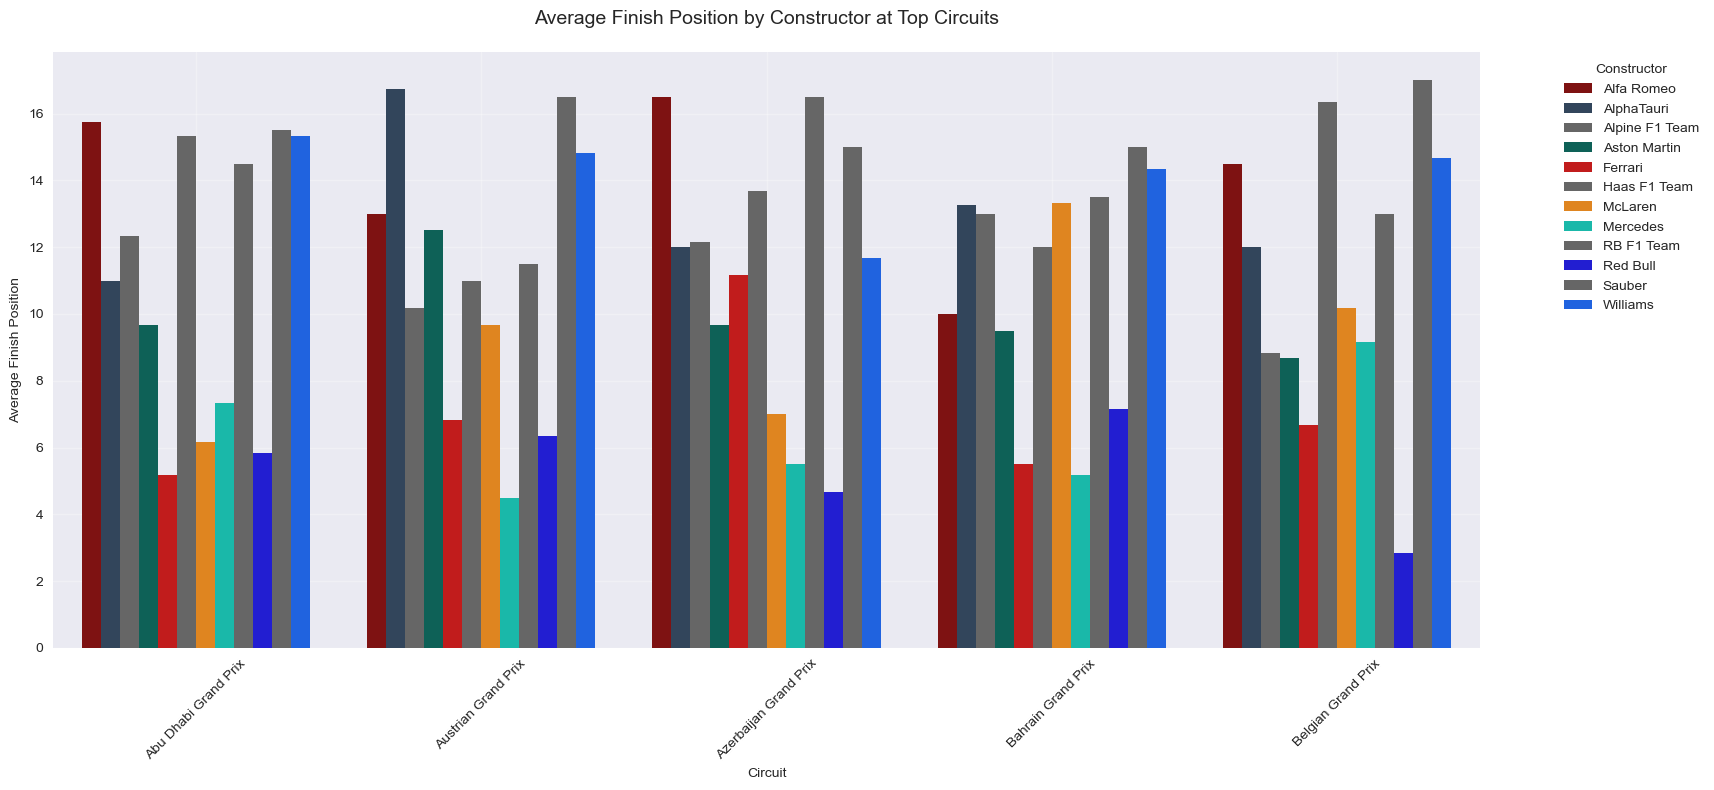

In [397]:
# Analyze track performance by constructor
track_performance = enhanced_race_results.groupby(['raceName', 'constructorName'])['position'].agg(['mean', 'count']).reset_index()

# Filter for tracks with sufficient data
top_tracks = track_performance.groupby('raceName')['count'].sum().nlargest(5).index
track_perf_filtered = track_performance[track_performance['raceName'].isin(top_tracks)]

# Create track performance plot
plt.figure(figsize=(15, 8))

# Create color palette for constructors
constructors_in_plot = track_perf_filtered['constructorName'].unique()
palette = {team: f1_team_colors.get(team, '#666666') for team in constructors_in_plot}

ax = sns.barplot(
    data=track_perf_filtered,
    x='raceName',
    y='mean',
    hue='constructorName',
    palette=palette
)

format_plot(
    title='Average Finish Position by Constructor at Top Circuits',
    xlabel='Circuit',
    ylabel='Average Finish Position',
    rotation=45
)
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')

# 5. Performance Summary

Visualizing the top 10 drivers in the championship standings for each year, colored by their team.

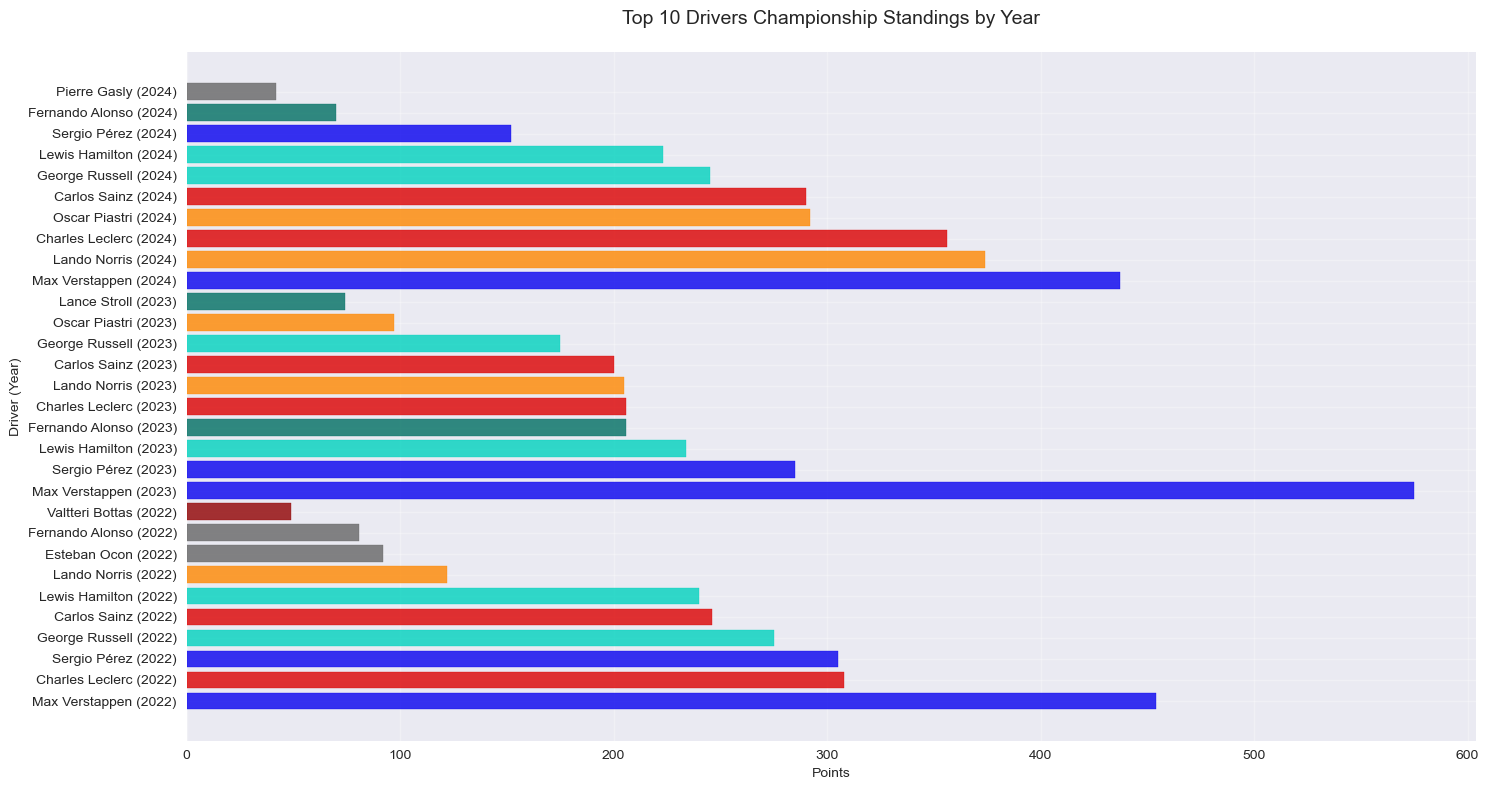

In [398]:
# Get top 10 drivers per year
top_drivers = all_driver_standings.sort_values(['year', 'position']).groupby('year').head(10)

plt.figure(figsize=(15, 8))
ax = plt.gca()

# Plot each year separately
for year in sorted(top_drivers['year'].unique()):
    year_data = top_drivers[top_drivers['year'] == year]
    bars = ax.barh(
        [f"{driver} ({year})" for driver in year_data['driverName']],
        year_data['points'],
        alpha=0.8
    )
    # Color bars by team
    for bar, team in zip(bars, year_data['constructorName']):
        bar.set_color(f1_team_colors.get(team, '#666666'))

format_plot(
    title='Top 10 Drivers Championship Standings by Year',
    xlabel='Points',
    ylabel='Driver (Year)'
)



Detailed Team Performance Metrics:


,Avg Points,Total Points,Avg Position,DNF Rate %,Avg Q3 Time,Q1-Q3 Improvement
constructorName,,,,,,
Red Bull,15.08,2051,4.93,12.50,85.08,1.14
Ferrari,10.86,1477,6.52,16.18,84.84,1.25
Mercedes,9.57,1302,6.51,11.76,84.92,0.99
McLaren,7.54,1025,8.16,18.38,84.48,1.18
Aston Martin,3.05,415,10.88,33.82,85.23,1.00
Alpine F1 Team,2.52,343,11.54,41.91,84.46,0.86
Haas F1 Team,0.68,93,13.87,54.41,83.03,0.82
Alfa Romeo,0.78,69,13.60,48.86,85.54,0.57
AlphaTauri,0.65,57,13.57,48.86,91.52,0.73


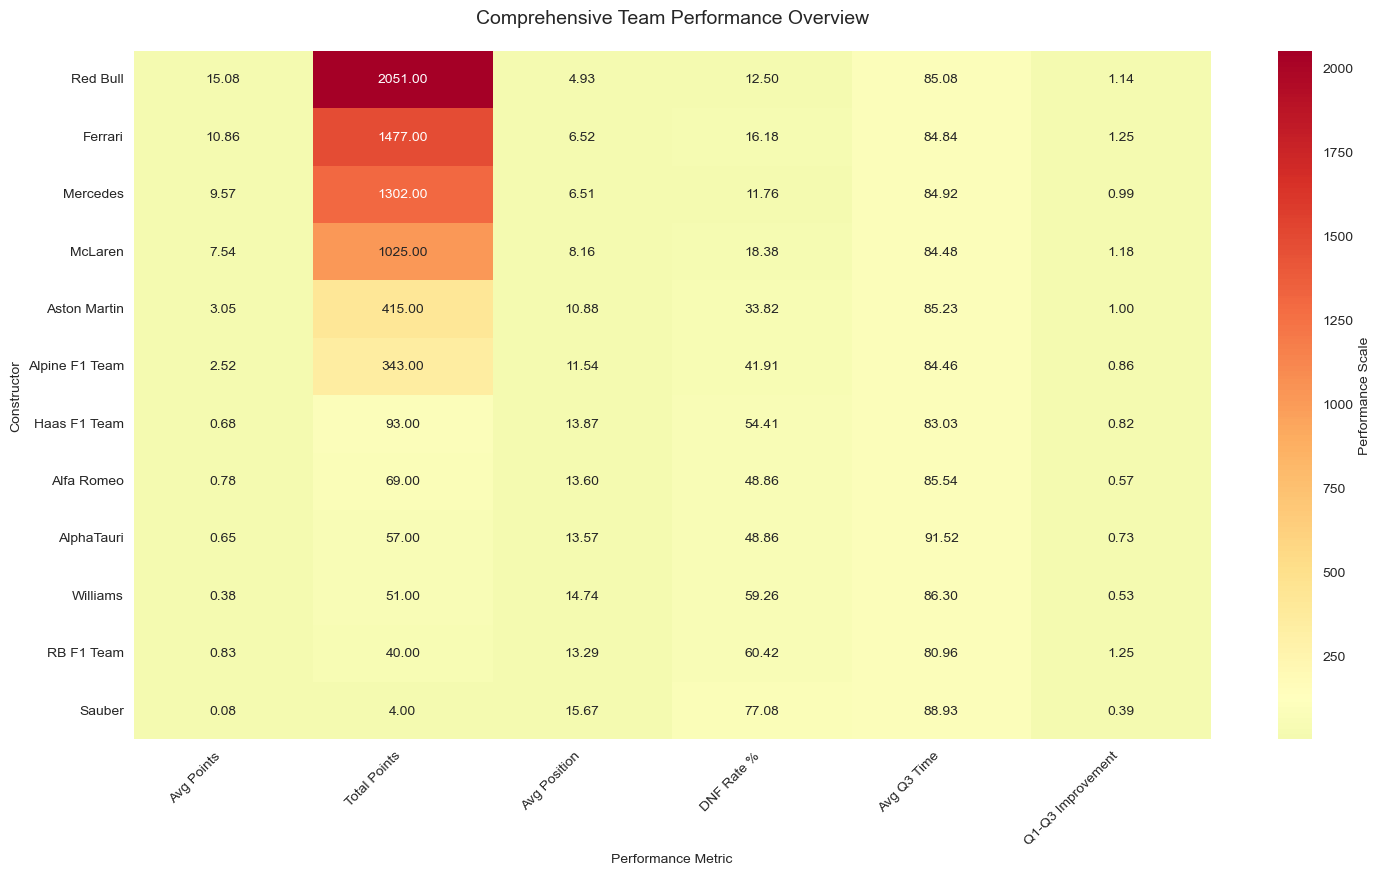

In [399]:
# Calculate comprehensive team performance metrics
team_metrics = pd.DataFrame()

# Points and positions metrics
team_metrics['Avg Points'] = enhanced_race_results.groupby('constructorName')['points'].mean()
team_metrics['Total Points'] = enhanced_race_results.groupby('constructorName')['points'].sum()
team_metrics['Avg Position'] = enhanced_race_results.groupby('constructorName')['position'].mean()

# Reliability metrics
team_metrics['DNF Rate %'] = enhanced_race_results.groupby('constructorName').apply(
    lambda x: (x['finish_category'] != 'Finished').mean() * 100
)

# Qualifying performance
team_metrics['Avg Q3 Time'] = enhanced_qualifying_results.groupby('constructorName')['Q3_seconds'].mean()
team_metrics['Q1-Q3 Improvement'] = enhanced_qualifying_results.groupby('constructorName')['q_improvement'].mean()

# Sort by total points
team_metrics = team_metrics.sort_values('Total Points', ascending=False)

# Create heatmap of metrics
plt.figure(figsize=(15, 8))
ax = sns.heatmap(
    team_metrics,
    annot=True,
    fmt='.2f',
    cmap='RdYlGn_r',
    center=team_metrics.mean().mean(),
    cbar_kws={'label': 'Performance Scale'}
)

format_plot(
    title='Comprehensive Team Performance Overview',
    xlabel='Performance Metric',
    ylabel='Constructor'
)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Display detailed metrics
print('\nDetailed Team Performance Metrics:')
display(team_metrics.round(2))

## Race Results Analysis

This section analyzes race performance data including:
- Finishing positions and points
- DNF rates and types
- Track-specific performance patterns
- Constructor performance trends

In [400]:
# Load race results data
race_results = {}
for year in [2022, 2023, 2024]:
    race_results[year] = pd.read_csv(f'data_csv/results_{year}_all_rounds.csv')

# Merge all results
all_race_results = pd.concat(race_results.values(), ignore_index=True)

# Display sample
print('Race Results Sample:')
display(all_race_results.head())

Race Results Sample:


,year,round,raceName,date,driverName,constructorName,position,points,status,grid,laps,fastestLapTime
0,2022,1,Bahrain Grand Prix,2022-03-20,Charles Leclerc,Ferrari,1,26,Finished,1,57,1:34.570
1,2022,1,Bahrain Grand Prix,2022-03-20,Carlos Sainz,Ferrari,2,18,Finished,3,57,1:35.740
2,2022,1,Bahrain Grand Prix,2022-03-20,Lewis Hamilton,Mercedes,3,15,Finished,5,57,1:36.228
3,2022,1,Bahrain Grand Prix,2022-03-20,George Russell,Mercedes,4,12,Finished,9,57,1:36.302
4,2022,1,Bahrain Grand Prix,2022-03-20,Kevin Magnussen,Haas F1 Team,5,10,Finished,7,57,1:36.623


### DNF Analysis
Analyzing Did Not Finish (DNF) rates across seasons

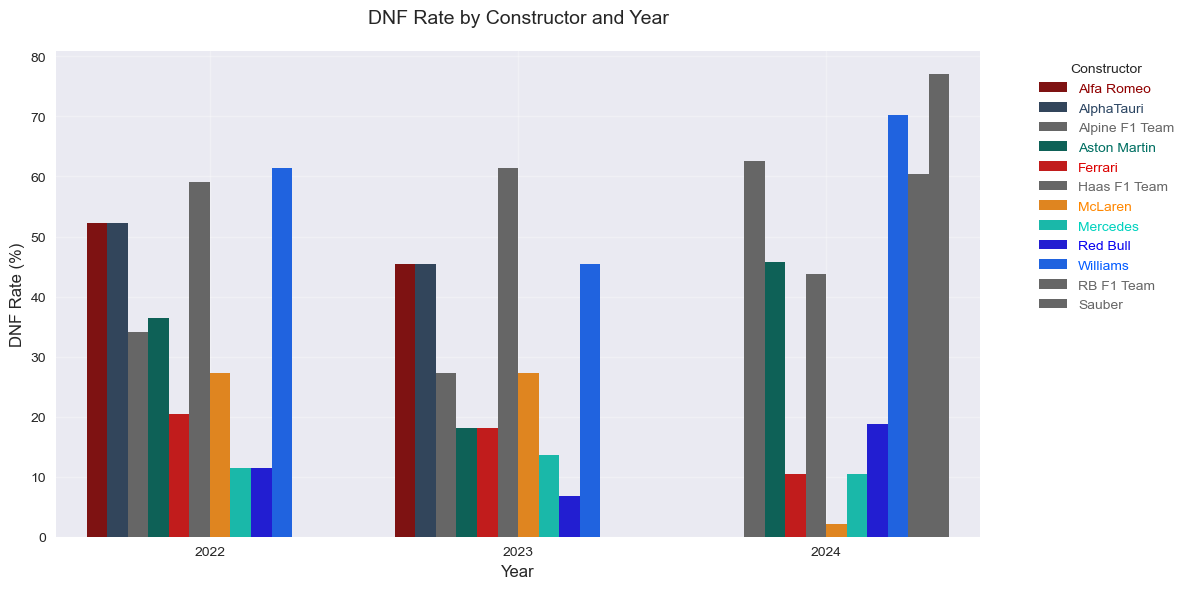

In [401]:
# Calculate DNF rates per constructor and year
dnf_by_team = all_race_results.groupby(['year', 'constructorName']).agg(
    total_races=('status', 'count'),
    dnfs=('status', lambda x: (x != 'Finished').sum())
).reset_index()

dnf_by_team['dnf_rate'] = (dnf_by_team['dnfs'] / dnf_by_team['total_races']) * 100

plt.figure(figsize=(12, 6))

# Create a list of unique constructors and years for proper color mapping
constructors = dnf_by_team['constructorName'].unique()
years = dnf_by_team['year'].unique()

# Create the plot with a custom palette
palette = {team: f1_team_colors.get(team, '#666666') for team in constructors}
ax = sns.barplot(data=dnf_by_team, x='year', y='dnf_rate', hue='constructorName', palette=palette)

plt.title('DNF Rate by Constructor and Year', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('DNF Rate (%)', fontsize=12)

# Customize legend
legend = plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
for text, team in zip(legend.get_texts(), constructors):
    text.set_color(f1_team_colors.get(team, '#666666'))

plt.grid(True, alpha=0.3)
plt.tight_layout()

## Qualifying Performance Analysis

Analyzing qualifying session performance including:
- Pole position distribution
- Qualifying time improvements
- Team qualifying pace
- Q1 to Q3 progression

In [402]:
# Load qualifying data
qualifying_results = {}
for year in [2022, 2023, 2024]:
    qualifying_results[year] = pd.read_csv(f'data_csv/qualifying_{year}_all_rounds.csv')

# Merge all qualifying data
all_qualifying_results = pd.concat(qualifying_results.values(), ignore_index=True)

# Display sample
print('Qualifying Results Sample:')
display(all_qualifying_results.head())

Qualifying Results Sample:


,year,round,raceName,date,driverName,constructorName,position,Q1,Q2,Q3
0,2022,1,Bahrain Grand Prix,2022-03-20,Charles Leclerc,Ferrari,1,1:31.471,1:30.932,1:30.558
1,2022,1,Bahrain Grand Prix,2022-03-20,Max Verstappen,Red Bull,2,1:31.785,1:30.757,1:30.681
2,2022,1,Bahrain Grand Prix,2022-03-20,Carlos Sainz,Ferrari,3,1:31.567,1:30.787,1:30.687
3,2022,1,Bahrain Grand Prix,2022-03-20,Sergio Pérez,Red Bull,4,1:32.311,1:31.008,1:30.921
4,2022,1,Bahrain Grand Prix,2022-03-20,Lewis Hamilton,Mercedes,5,1:32.285,1:31.048,1:31.238


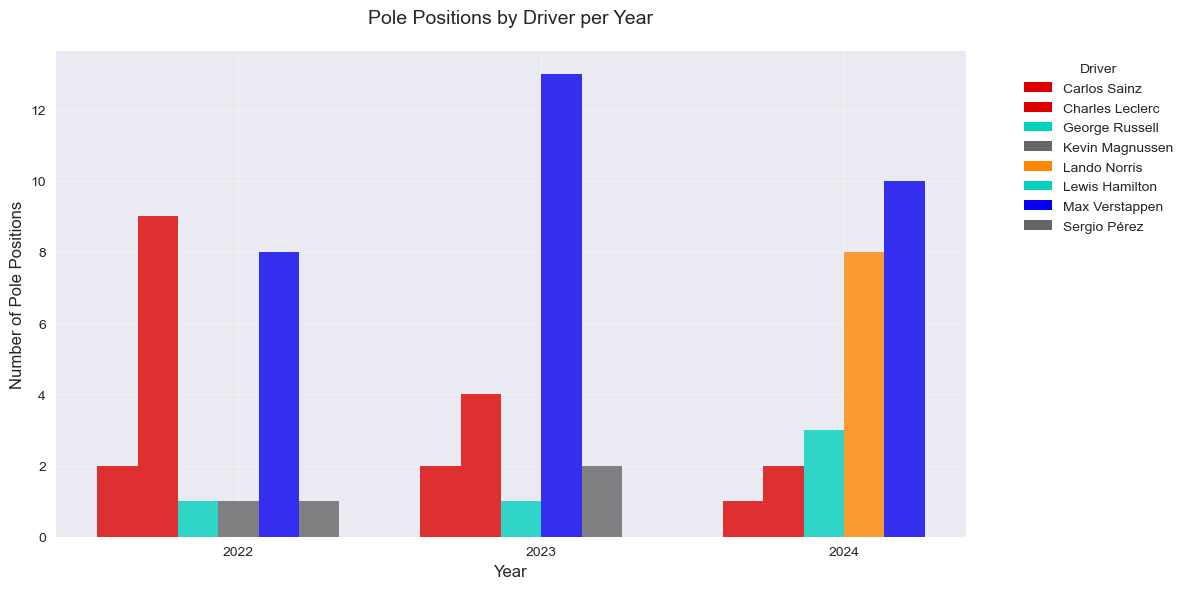

In [403]:
# Analyze pole positions
pole_positions = all_qualifying_results[all_qualifying_results['position'] == 1]
pole_counts = pole_positions.groupby(['year', 'driverName']).size().reset_index(name='poles')

plt.figure(figsize=(12, 6))

# Create a dictionary to store x positions for each year
x_positions = {}
width = 0.8
years = sorted(pole_counts['year'].unique())
drivers_per_year = {year: pole_counts[pole_counts['year'] == year].shape[0] for year in years}
max_drivers = max(drivers_per_year.values())

for i, year in enumerate(years):
    year_data = pole_counts[pole_counts['year'] == year]
    n_drivers = len(year_data)
    start = i - (n_drivers * width) / (2 * max_drivers)
    x_positions[year] = [start + j * width / max_drivers for j in range(n_drivers)]
    
    # Plot bars for each year
    for x, (_, row) in zip(x_positions[year], year_data.iterrows()):
        color = get_driver_color(row['driverName'])
        plt.bar(x, row['poles'], width=width/max_drivers, color=color, alpha=0.8)

# Customize plot
plt.title('Pole Positions by Driver per Year', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Pole Positions', fontsize=12)

# Set x-ticks to show years
plt.xticks(range(len(years)), years)

# Create legend with unique drivers
unique_drivers = sorted(pole_counts['driverName'].unique())
legend_elements = [plt.Rectangle((0,0),1,1, facecolor=get_driver_color(driver)) 
                  for driver in unique_drivers]
plt.legend(legend_elements, unique_drivers, title='Driver', 
          bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True, alpha=0.3)
plt.tight_layout()

C:\Users\Fares\AppData\Local\Temp\ipykernel_26996\1870958113.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


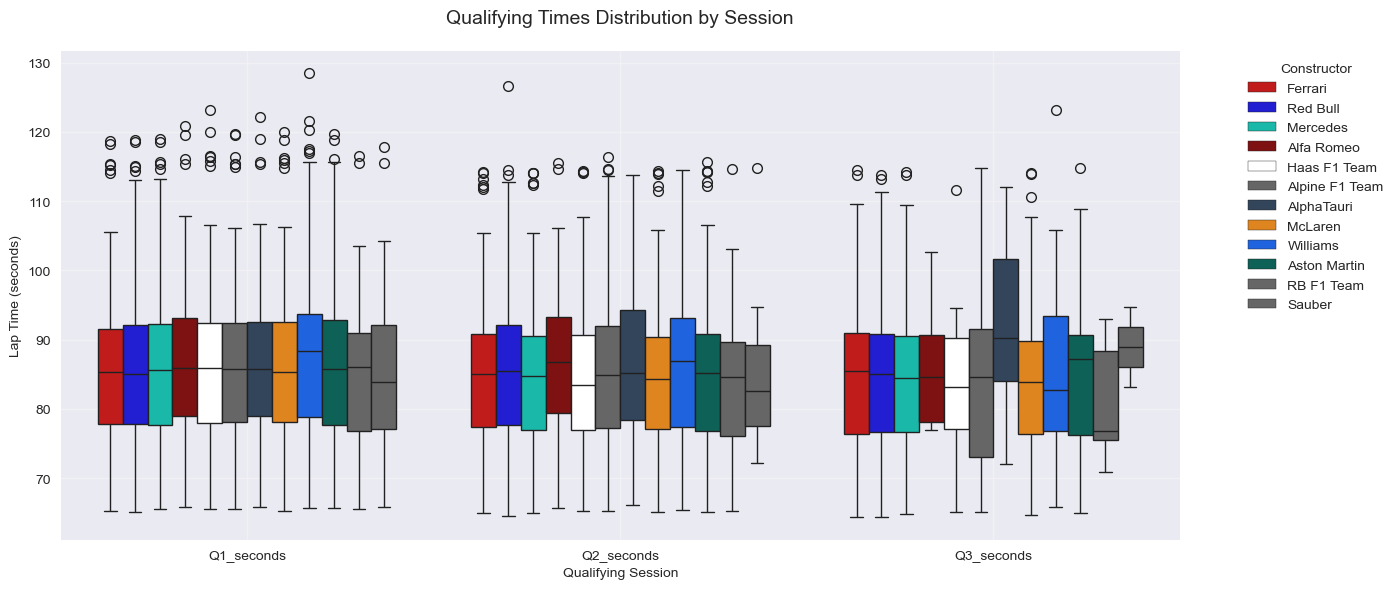

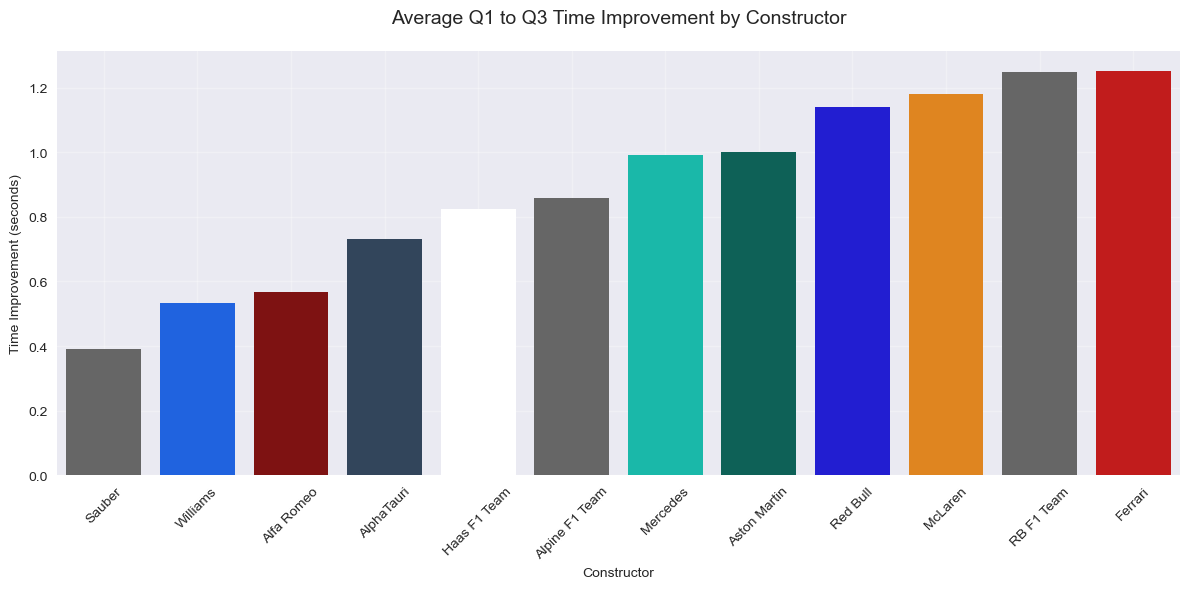

In [404]:
# Analyze qualifying session time improvements
q_times = enhanced_qualifying_results.melt(
    id_vars=['year', 'driverName', 'constructorName', 'raceName'],
    value_vars=['Q1_seconds', 'Q2_seconds', 'Q3_seconds'],
    var_name='session',
    value_name='time'
).dropna()

# Calculate session improvements

# Extend f1_team_colors to cover all constructors in the data
extended_team_colors = f1_team_colors.copy()
# Add missing teams with distinct or default colors
extended_team_colors.update({
    'RB F1 Team': '#666666',           # Default gray or pick a color
    'Haas F1 Team': '#FFFFFF',         # White (same as Haas in f1_team_colors)
    'Sauber': '#666666',               # Default gray or pick a color
    'Alpine F1 Team': '#666666'        # Default gray or pick a color
})

plt.figure(figsize=(12, 6))
ax = sns.boxplot(
    data=q_times,
    x='session',
    y='time',
    hue='constructorName',
    palette=extended_team_colors
)

format_plot(
    title='Qualifying Times Distribution by Session',
    xlabel='Qualifying Session',
    ylabel='Lap Time (seconds)'
)
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot time improvements by constructor
plt.figure(figsize=(12, 6))

q_improvements = enhanced_qualifying_results.groupby('constructorName')['q_improvement'].mean().sort_values(ascending=True)

ax = sns.barplot(
    x=q_improvements.index,
    y=q_improvements.values,
    palette=extended_team_colors
)

format_plot(
    title='Average Q1 to Q3 Time Improvement by Constructor',
    xlabel='Constructor',
    ylabel='Time Improvement (seconds)',
    rotation=45
)